In [36]:
import sympy
from einsteinpy.symbolic import MetricTensor, RicciTensor, RicciScalar, ChristoffelSymbols, RiemannCurvatureTensor
sympy.init_printing()  # enables the best printing available in an environment

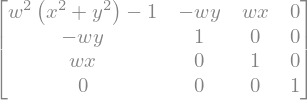

In [37]:
syms = sympy.symbols('t x y z')
cons = sympy.symbols('w')
# define the metric
metric = [[0 for i in range(4)] for i in range(4)]
metric[0][0] = -(1 - (syms[1]**2 + syms[2]**2)*cons**2)
metric[0][1] = -cons*syms[2]
metric[0][2] = cons*syms[1]
metric[1][1] = 1
metric[2][2] = 1
metric[3][3] = 1
metric[1][0] = -cons*syms[2]
metric[2][0] = cons*syms[1]

# creating metric object
m_obj = MetricTensor(metric, syms)
sympy.simplify(m_obj.tensor())

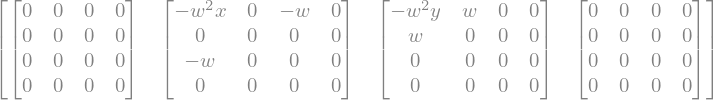

In [38]:
# Calculating the christoffel symbols
ch = ChristoffelSymbols.from_metric(m_obj)
sympy.simplify(ch.tensor())

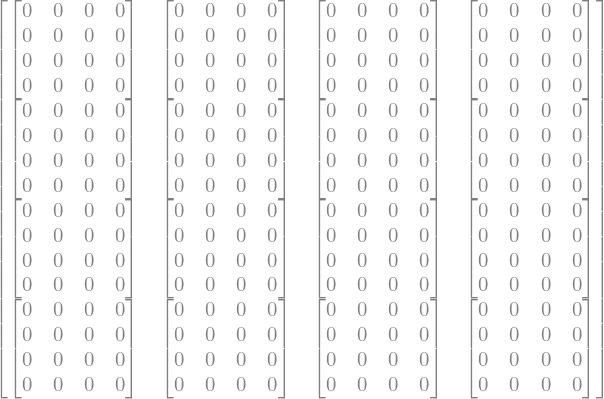

In [39]:
# Calculating Riemann Curvature Tensor from Christoffel Symbols
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
sympy.simplify(rm1.tensor())

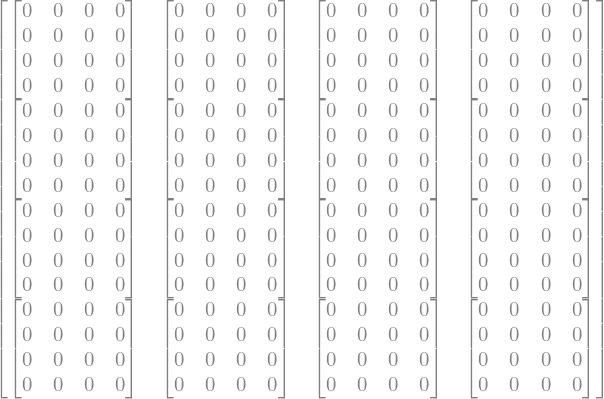

In [40]:
# Calculating Riemann Curvature Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(m_obj)
sympy.simplify(rm2.tensor())

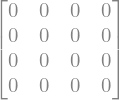

In [41]:
# Calculating the Ricci Tensor (with both indices covariant)
Ric = RicciTensor.from_metric(m_obj)
sympy.simplify(Ric.tensor())

In [42]:
# Calculating the Ricci Scalar (Scalar Curvature) from the Ricci Tensor
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr